# Trying out NumPy's SVD on Medical Images

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline

In [3]:
#Parameters
vmin = 0
vmax = 1
image_bias = 1 

Import image to take SVD of

Size of the image is :  (300, 150)


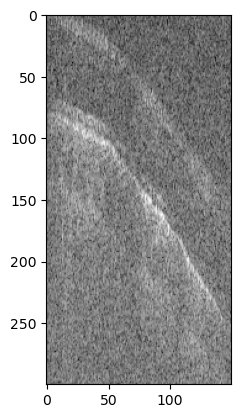

In [63]:
# Open the PNG image
image = Image.open('test1.tif')

# Convert the image to grayscale
grayscale_image = image.convert('L')

# Convert the image to a NumPy array
A = np.array(grayscale_image)

# Remember image size
n = len(A)
print("Size of the image is : " , A.shape)

# Show image
imshow(A, cmap='gray')
plt.show()

## Taking SVD

In [66]:
U, S, Vt = svd(A)

## Observing U

In [73]:
# Size of U
print("Size of U is: ", U.shape)

Size of U is:  (300, 300)


In [42]:
print(np.round(U,2))

[[-0.05  0.02 -0.05 ... -0.02 -0.01  0.05]
 [-0.05  0.02 -0.05 ... -0.05  0.01 -0.07]
 [-0.05  0.03 -0.05 ...  0.04 -0.05  0.01]
 ...
 [-0.06 -0.02 -0.04 ... -0.    0.01 -0.1 ]
 [-0.06 -0.03 -0.05 ...  0.   -0.    0.04]
 [-0.06 -0.04 -0.05 ...  0.02  0.01  0.06]]


## Observing S

In [71]:
# Size of U
print("Size of Sigma is: ", S.shape)

Size of Sigma is:  (150,)


In [72]:
print(np.round(S,2))

[27492.91  1511.35  1165.36   950.67   828.15   730.7    711.54   705.87
   659.8    647.8    621.73   612.94   600.78   588.42   576.35   571.82
   566.88   563.76   548.55   541.37   535.97   527.05   521.9    512.28
   508.81   499.32   489.79   485.49   479.87   471.52   465.03   463.76
   460.96   452.23   445.     436.3    429.31   427.19   424.1    418.16
   411.36   404.96   403.44   402.82   395.56   392.44   387.57   384.95
   382.78   377.16   370.35   366.75   364.06   359.7    353.46   349.28
   347.04   342.39   341.71   335.71   333.06   331.93   329.     327.07
   320.94   315.7    311.39   308.29   305.18   301.84   299.37   292.81
   290.69   285.17   280.85   279.71   275.22   272.32   269.33   265.64
   264.18   262.68   256.58   252.77   251.68   248.45   246.92   244.85
   239.42   237.16   235.3    230.86   228.57   224.73   221.33   217.4
   212.95   211.26   208.54   207.58   205.35   199.44   198.31   194.34
   192.03   189.03   186.88   186.01   182.15   178.

In [67]:
S_matrix = np.diag(S)
print(np.round(S_matrix,2))

[[27492.91     0.       0.   ...     0.       0.       0.  ]
 [    0.    1511.35     0.   ...     0.       0.       0.  ]
 [    0.       0.    1165.36 ...     0.       0.       0.  ]
 ...
 [    0.       0.       0.   ...    84.05     0.       0.  ]
 [    0.       0.       0.   ...     0.      81.07     0.  ]
 [    0.       0.       0.   ...     0.       0.      75.71]]


In [97]:
threshold = 400
filter = (S_matrix > threshold)*1 
filtered_S = np.multiply(S_matrix, filter)
print(np.round(filtered_S,2))

[[27492.91     0.       0.   ...     0.       0.       0.  ]
 [    0.    1511.35     0.   ...     0.       0.       0.  ]
 [    0.       0.    1165.36 ...     0.       0.       0.  ]
 ...
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]]


NumPy saves sigma as a vector not a Matrix. Remember to create a diagonal matrix from it first.

In [98]:
final_S = np.zeros((300, 150))
final_S[:150, :150] = filtered_S

### First matrix

In [99]:
# Reconstruct the image by multiplying the SVD components
now_image = np.dot(U, np.dot(final_S, Vt))

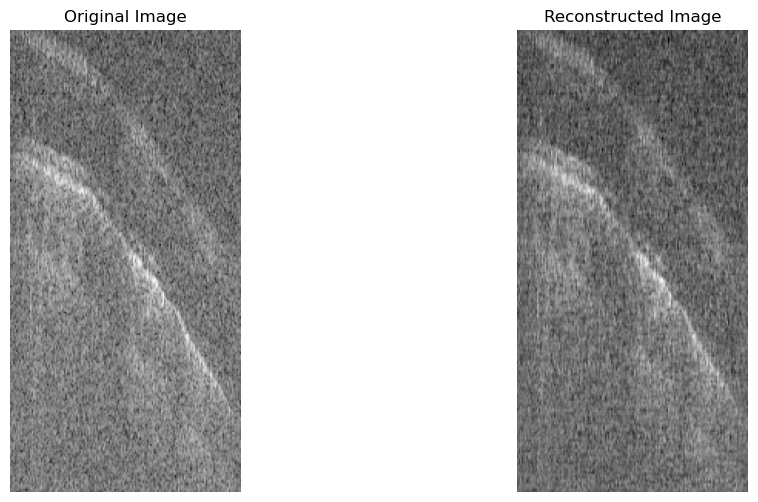

In [100]:
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Plot reconstructed image
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(now_image, cmap='gray')
plt.axis('off')

plt.show()